In [1]:
import os
import pandas as pd
from fredapi import Fred
from utils.env_utils import load_root_env
load_root_env()

In [2]:
fred = Fred(api_key=os.getenv("FRED_API_KEY"))
data = fred.get_series_all_releases('GDP')
fred.get_series_info("GDP")

id                                                                         GDP
realtime_start                                                      2025-01-30
realtime_end                                                        2025-01-30
title                                                   Gross Domestic Product
observation_start                                                   1947-01-01
observation_end                                                     2024-10-01
frequency                                                            Quarterly
frequency_short                                                              Q
units                                                      Billions of Dollars
units_short                                                          Bil. of $
seasonal_adjustment                            Seasonally Adjusted Annual Rate
seasonal_adjustment_short                                                 SAAR
last_updated                                        

In [3]:
data.dropna(inplace=True)
data['date'] = pd.to_datetime(data['date'])
data['realtime_start'] = pd.to_datetime(data['realtime_start'])
data = data.rename({'value':'GDP'}, axis=1)
data['GDP'] = data['GDP'].astype(float)

<Axes: xlabel='date'>

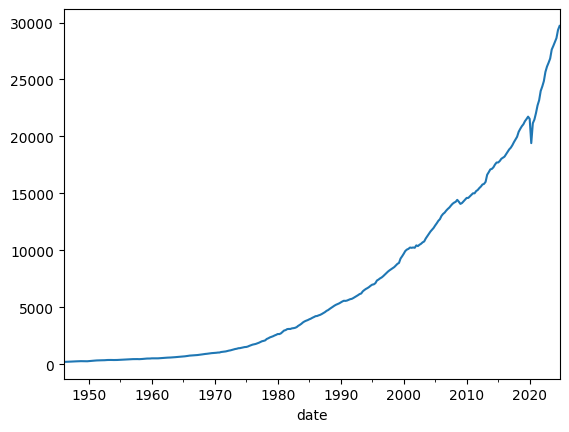

In [4]:
data.drop_duplicates('date').set_index("date")['GDP'].plot()